# Seaborn (data visualiazation)

### First look at the Seaborn Library

In [5]:
import seaborn as sns # we involved seaborn library our project 

plnts = sns.load_dataset("Planets")
plnts.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df = plnts.copy()

df.info() # get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
import pandas as pd

df.method = pd.Categorical(df.method) # to change 'object' type with 'category' type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


### Description of the data set

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [9]:
# examining the missing value

df.isnull().values.any() # is there missing value?

True

In [10]:
df.isnull().sum() # alright, how many are missing in which variable? 

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
# to fill the missing values:

df['orbital_period'].fillna(0, inplace = True) # fill with zero 
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [12]:
df['mass'].fillna(df.mass.mean(), inplace=True) # fill with the average of the value
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df.fillna(df.mean(), inplace = True) # without enter value name
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

### Categorical variable summaries

In [17]:
cat_df = plnts.select_dtypes(include = ['object']) # involved categorical value to variable 
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [19]:
cat_df.method.unique() # 'unique' give value names

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [22]:
cat_df["method"].value_counts().count() # total value name

10

In [23]:
cat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

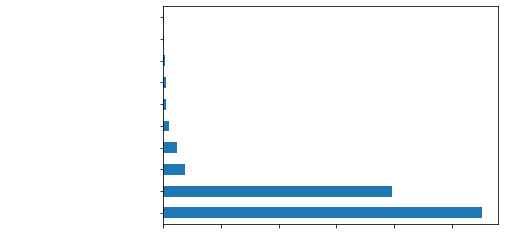

In [26]:
import matplotlib.pyplot as plt

df['method'].value_counts().plot.barh();
plt.xticks(color="white");
plt.yticks(color="white");